# Machine Learning - Customer Churn prediction classification system.
### By - Bhawesh Sinha
### Associated with *Afame Technology*

# Importing all required Libraries

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Loading the dataset

In [151]:
df = pd.read_csv('Churn_Modelling.csv')

## Dataset overview

In [152]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [153]:
df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# Performing Exploratoy Data Analysis 

## Descriptive Statistics of the dataset

In [154]:
df.shape

(10000, 11)

In [155]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [157]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [158]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [159]:
df.duplicated().sum()

0

1. All the attributes of the dataset are in their proper data type.
2. Non of them are having any Missing or Null/NA values.
3. Non of the rows of the entire dataset are having any duplicated values.

## Inferential Statistics and Data Visualization

### Dealing with Categorical attributes.

In [160]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

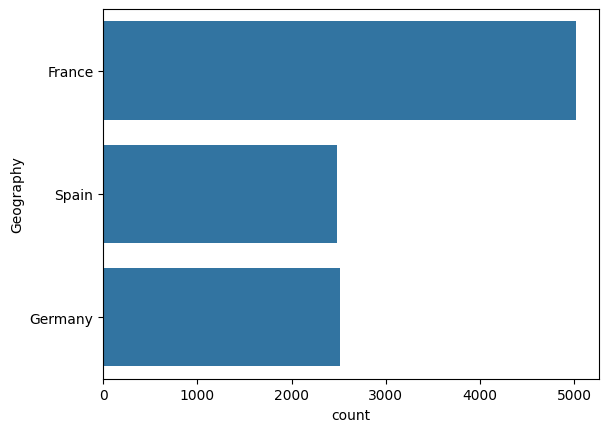

In [161]:
sns.countplot(df['Geography'])
plt.show()

In [162]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

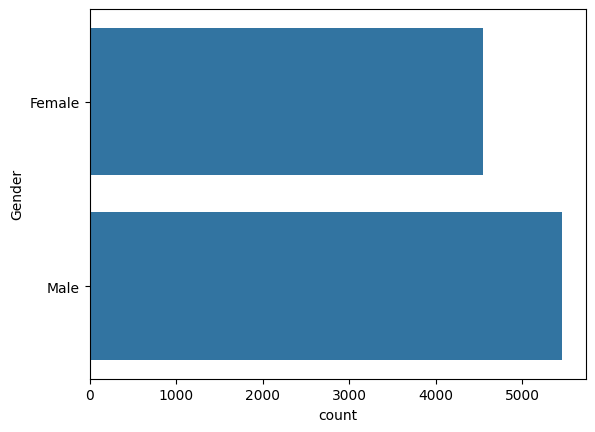

In [163]:
sns.countplot(df['Gender'])
plt.show()

In [164]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [165]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [166]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [167]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [168]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

### Dealing with numerical attributes.

In [169]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

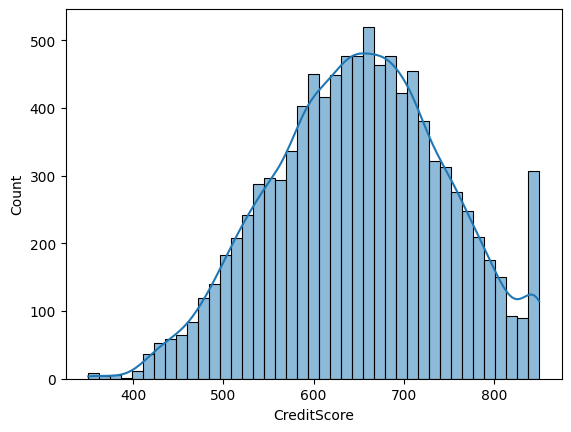

In [170]:
sns.histplot(df['CreditScore'],kde=True)
plt.show()

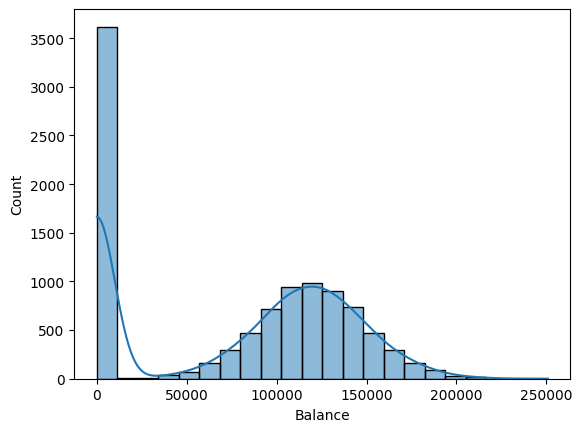

In [171]:
sns.histplot(df['Balance'],kde=True)
plt.show()

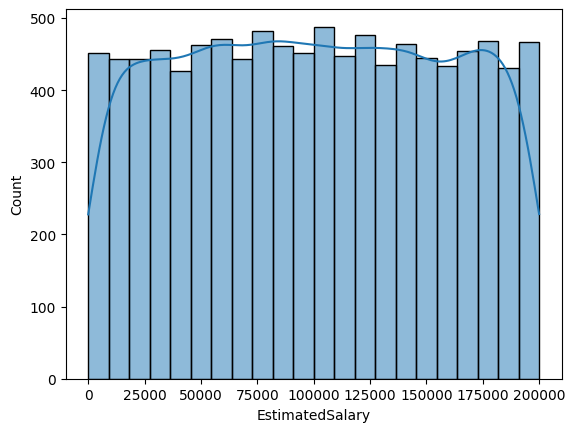

In [172]:
sns.histplot(df['EstimatedSalary'],kde=True)
plt.show()

# Encoding
### For : 'Geography' and 'Gender' Columns

In [173]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [174]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [175]:
geo = []
gen = []
for i in df['Geography']:
    if i == 'France':
        geo.append(1)
    elif i == 'Germany':
        geo.append(2)
    else:
        geo.append(3)
for j in df['Gender']:
    if j == 'Female':
        gen.append(0)
    else:
        gen.append(1)
df['Geography(encoded)'] = geo
df['Gender(encoded)'] = gen

In [176]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography(encoded),Gender(encoded)
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,3,0


In [177]:
df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography(encoded),Gender(encoded)
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,1,0


In [178]:
df.drop(['Geography','Gender'],axis=1,inplace=True)

# Splitting the Dataset in Training and Testing sets

In [179]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography(encoded)',
       'Gender(encoded)'],
      dtype='object')

In [180]:
x = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography(encoded)',
       'Gender(encoded)']]
y = df[['Exited']]

In [181]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography(encoded),Gender(encoded)
0,619,42,2,0.00,1,1,1,101348.88,1,0
1,608,41,1,83807.86,1,0,1,112542.58,3,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0
4,850,43,2,125510.82,1,1,1,79084.10,3,0


In [182]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [183]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [184]:
x_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography(encoded),Gender(encoded)
7225,781,35,7,92526.15,2,1,1,173837.54,2,1
9362,684,35,3,137179.39,1,1,1,37264.11,1,1
6582,525,60,7,0.00,2,0,1,168034.90,3,0
2889,594,31,9,0.00,1,0,1,5719.11,1,0
3855,708,32,3,151691.44,2,1,1,172810.51,2,1


In [185]:
y_train.head()

,Exited
7225,0
9362,0
6582,0
2889,0
3855,0


In [186]:
x_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography(encoded),Gender(encoded)
7103,552,42,8,103362.14,1,0,1,186869.58,2,0
6705,663,33,5,157274.36,2,1,1,28531.81,1,1
1233,667,39,4,83765.35,2,1,0,118358.54,2,0
4714,567,23,9,93522.20,1,0,1,81425.61,1,0
5595,608,33,4,0.00,1,0,1,130474.03,1,1


In [187]:
y_test.head()

,Exited
7103,1
6705,0
1233,0
4714,0
5595,0


In [188]:
y_train['Exited'].value_counts()

Exited
0    6376
1    1624
Name: count, dtype: int64

In [189]:
y_test['Exited'].value_counts()

Exited
0    1587
1     413
Name: count, dtype: int64

# Logistic regression model training

In [190]:
logR = LogisticRegression()

In [191]:
logR.fit(x_train,y_train)

C:\Users\BHAWESH SINHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BHAWESH SINHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [192]:
y_pred = logR.predict(x_test)

In [193]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [194]:
accuracy_score(y_test,y_pred)*100

78.95

# Random forest classification model training

In [195]:
rfc = RandomForestClassifier()

In [196]:
rfc.fit(x_train,y_train)

C:\Users\BHAWESH SINHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [197]:
y_pred_2 = rfc.predict(x_test)

In [198]:
accuracy_score(y_test,y_pred_2)*100

86.65

# Gredient boosting classification model training

In [199]:
gbc = GradientBoostingClassifier()

In [200]:
gbc.fit(x_train,y_train)

C:\Users\BHAWESH SINHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [201]:
y_pred_3 = gbc.predict(x_test)

In [202]:
accuracy_score(y_test,y_pred_3)*100

86.25

# Creating an Accuracy matrix

In [203]:
dic = {'Model':['Logistic Regression','Random Forest Classifier', 'Gredient Boosting Classifier'],
      'Accuracy': [f'{int(accuracy_score(y_test,y_pred)*100)} %',f'{int(accuracy_score(y_test,y_pred_2)*100)} %',f'{int(accuracy_score(y_test,y_pred_3)*100)} %']}

In [204]:
accuracy_matrix = pd.DataFrame(data=dic)

In [205]:
accuracy_matrix

,Model,Accuracy
0,Logistic Regression,78 %
1,Random Forest Classifier,86 %
2,Gredient Boosting Classifier,86 %


# <---------------------------(END OF PROJECT)------------------->